<a href="https://colab.research.google.com/github/jjyjung/ai/blob/gh-pages/tf_keras_DNN_BMI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

from google.colab import drive

drive.mount('/content/gdrive')   # google drive를 google colab에 연결. 처음 실행 시, 인증 필요 

In [2]:
# # Jupyter Notebook에서 실행시킬 때에는 아래 2개 셀 대신에 이 코드를 실행하세요.
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers  # 모듈(변수나 함수를 포함)만 불러오기

# # BMI 데이터를 읽어 들이고 정규화하기

df = pd.read_csv("csv/iris.csv")

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,iris_type
0,6.4,3.1,5.5,1.8,Iris-virginica
1,6.5,3.0,5.8,2.2,Iris-virginica
2,4.6,3.1,1.5,0.2,Iris-setosa
3,6.4,2.8,5.6,2.1,Iris-virginica
4,5.0,3.3,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,5.1,3.8,1.9,0.4,Iris-setosa
146,5.7,2.8,4.5,1.3,Iris-versicolor
147,6.9,3.1,5.4,2.1,Iris-virginica
148,7.2,3.0,5.8,1.6,Iris-virginica


In [9]:
print(np.round(df['sepal_length'].mean(),2), np.round(df['sepal_length'].std(),2))
print(np.round(df['sepal_width'].mean(),2), np.round(df['sepal_width'].std(),2))
print(np.round(df['petal_length'].mean(),2), np.round(df['petal_length'].std(),2))
print(np.round(df['petal_width'].mean(),2), np.round(df['petal_width'].std(),2))

5.84 0.83
3.05 0.43
3.76 1.76
1.2 0.76


In [12]:
# 몸무게와 키 데이터
(df["sepal_length"]-5.84) / 0.83   # normalization
(df["sepal_width"]-3.05) / 0.43 
(df["petal_length"]-3.76) / 1.76 
(df["petal_width"]-1.2) / 0.76 

# X = df[["weight", "height"]].to_numpy()
X = df.iloc[:,0:4]

# 레이블링, 라벨링 (labelling) => one-hot encoding
bclass = {"Iris-setosa":[1,0,0], "Iris-versicolor":[0,1,0], "Iris-virginica":[0,0,1]}
y = np.empty((150,3))     # 2000x3 크기의 다차원 벡터 생성
for i, v in enumerate(df["iris_type"]):
    y[i] = bclass[v]        # "thin'이면, y[i]=[1,0,0] 와 같이 할당
    
# 훈련 전용 데이터와 테스트 전용 데이터로 나누기
X_train, y_train = X[0:100], y[0:100]
X_test,  y_test  = X[100:150], y[100:150]

In [75]:
# 모델 구조 정의하기
model = tf.keras.Sequential()         # 순차적 계층화 준비
model.add(layers.Dense(6, input_shape=(4,)))  # 입력 4개로부터 전달받는 8개 노드의 layer 생성
model.add(layers.Activation('relu'))  # ReLU 활성화함수 채택
model.add(layers.Dropout(0.01))        # dropout ratio=20% (배치 훈련시 10% arc 무시)

model.add(layers.Dense(4))            # 6개 노드의 layer 생성
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.01))

model.add(layers.Dense(3))
model.add(layers.Activation('softmax'))# 분류(classification)을 위해 softmax 함수 사용

# 모델 구축하기
model.compile(
    loss='categorical_crossentropy',  # 다중 교차엔트로피
    optimizer="rmsprop",   # 최적화 기법 중 하나
    metrics=['accuracy',tf.keras.metrics.TruePositives(name='tp'), tf.keras.metrics.Precision(), tf.keras.metrics.AUC()])

In [76]:
# 데이터 훈련하기
hist = model.fit(
    X_train, y_train,
    batch_size=10,     # 5개에 한 번씩 업데이터 실행
    epochs=5,          # 훈련 데이터셋을 총 10회 반복 실험. 단, 조기중지될 수 있음
    validation_split=0.1,  
        #validation data 분할 비율. 즉, 100개 중에서 20%인 200개를 validation용으로 분할
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)],  
        #'val_loss'를 monitor하여 감소하면 한 번 더 참고 조기중지
    verbose=1)   # 전 과정을 화면에 출력(1) 또는 미출력(0) 모드

# 테스트 데이터로 평가하기
score = model.evaluate(X_test, y_test)
print('test_loss: ', score[0])
print('test_acc: ', score[1])

Epoch 1/5
9/9 [==============================] - 3s 122ms/step - loss: 1.3616 - accuracy: 0.3111 - tp: 28.0000 - precision_25: 0.3294 - auc_25: 0.6338 - val_loss: 0.9809 - val_accuracy: 0.6000 - val_tp: 6.0000 - val_precision_25: 0.7500 - val_auc_25: 0.7850
Epoch 2/5
9/9 [==============================] - 0s 9ms/step - loss: 1.1779 - accuracy: 0.3222 - tp: 28.0000 - precision_25: 0.4590 - auc_25: 0.6495 - val_loss: 0.8682 - val_accuracy: 0.6000 - val_tp: 6.0000 - val_precision_25: 0.7500 - val_auc_25: 0.7950
Epoch 3/5
9/9 [==============================] - 0s 11ms/step - loss: 1.0785 - accuracy: 0.5000 - tp: 27.0000 - precision_25: 0.7105 - auc_25: 0.6800 - val_loss: 0.7796 - val_accuracy: 0.8000 - val_tp: 6.0000 - val_precision_25: 1.0000 - val_auc_25: 0.8475
Epoch 4/5
9/9 [==============================] - 0s 9ms/step - loss: 0.9743 - accuracy: 0.6333 - tp: 27.0000 - precision_25: 0.9000 - auc_25: 0.7290 - val_loss: 0.7086 - val_accuracy: 0.8000 - val_tp: 7.0000 - val_precision_25: 1

In [77]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'tp', 'precision_25', 'auc_25', 'val_loss', 'val_accuracy', 'val_tp', 'val_precision_25', 'val_auc_25'])

In [78]:
score

[0.8557812571525574, 0.7200000286102295, 18.0, 1.0, 0.8059999942779541]

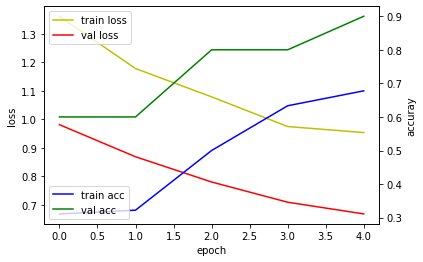

In [79]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [80]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 6)                 30        
                                                                 
 activation_75 (Activation)  (None, 6)                 0         
                                                                 
 dropout_50 (Dropout)        (None, 6)                 0         
                                                                 
 dense_76 (Dense)            (None, 4)                 28        
                                                                 
 activation_76 (Activation)  (None, 4)                 0         
                                                                 
 dropout_51 (Dropout)        (None, 4)                 0         
                                                                 
 dense_77 (Dense)            (None, 3)               

In [81]:
model.get_weights()

[array([[-0.12261248,  0.07350006, -0.24954985, -0.57083046,  0.6825891 ,
          0.5035509 ],
        [-0.37365708, -0.43590447,  0.13789321,  0.10847099,  0.6312213 ,
         -0.6704069 ],
        [-0.52761966,  0.30455127,  0.59732234,  0.72023374, -0.7060156 ,
         -0.07214554],
        [-0.7674975 , -0.24113022, -0.46511653, -0.05135358,  0.03347822,
         -0.07292071]], dtype=float32),
 array([ 0.        ,  0.03304118,  0.03164127, -0.00438442, -0.0431522 ,
         0.04281199], dtype=float32),
 array([[ 0.5565003 ,  0.65397406,  0.6627486 , -0.20402586],
        [-0.36623368,  0.5839611 , -0.04535835,  0.42781052],
        [ 0.3948926 , -0.17382815, -0.23731355, -0.6171372 ],
        [-0.8164841 , -0.24627915,  0.05215052,  0.00762985],
        [ 0.39080942,  0.25889242,  0.64115024,  0.09710862],
        [-0.5975844 ,  0.6546281 , -0.4583311 , -0.3764314 ]],
       dtype=float32),
 array([-0.00549799,  0.04298002, -0.04371041,  0.04403626], dtype=float32),
 array([[-0

In [82]:
model.save("dnn_iris")
print("Saved model to disk.")

from numpy import loadtxt
from tensorflow.python.keras.models import load_model

# 저장된 모델 읽어오기
loaded_model = load_model("dnn_iris")
model.summary()

# 모델을 평가하기
score = model.evaluate(X_test, y_test)
print('test_loss: ', score[0])
print('test_acc: ', score[1])

INFO:tensorflow:Assets written to: dnn_iris\assets
Saved model to disk.
Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 6)                 30        
                                                                 
 activation_75 (Activation)  (None, 6)                 0         
                                                                 
 dropout_50 (Dropout)        (None, 6)                 0         
                                                                 
 dense_76 (Dense)            (None, 4)                 28        
                                                                 
 activation_76 (Activation)  (None, 4)                 0         
                                                                 
 dropout_51 (Dropout)        (None, 4)                 0         
                                               

In [83]:
# X_test 샘플들의 클래스 예측하기
y_prob = model.predict(X_test)    # X_test의 출력값 확인하기
print(y_prob)

y_class = y_prob.argmax(axis=-1)  # X_test의 클래스 예측하기
y_class

2/2 [==============================] - 0s 5ms/step
[[0.63728714 0.32253143 0.04018141]
 [0.4236843  0.3736821  0.20263352]
 [0.3294058  0.29405725 0.37653682]
 [0.36323112 0.4300987  0.20667014]
 [0.24946326 0.2703003  0.48023644]
 [0.62388575 0.33032456 0.04578964]
 [0.63165474 0.32970554 0.03863974]
 [0.6660996  0.30576307 0.02813742]
 [0.20081457 0.21279915 0.5863862 ]
 [0.3528764  0.3774682  0.2696554 ]
 [0.334418   0.41865796 0.24692401]
 [0.6313257  0.32968894 0.03898529]
 [0.3524298  0.45348454 0.19408567]
 [0.6728131  0.30433467 0.02285219]
 [0.288825   0.35700083 0.35417405]
 [0.30694413 0.32213482 0.370921  ]
 [0.32191622 0.27932602 0.39875773]
 [0.3714551  0.41016045 0.21838433]
 [0.33379936 0.40104705 0.26515347]
 [0.623297   0.33042684 0.04627625]
 [0.5791477  0.3742925  0.04655977]
 [0.6028217  0.34656498 0.05061327]
 [0.37443677 0.33986214 0.2857011 ]
 [0.336348   0.33334762 0.3303044 ]
 [0.3288752  0.3397844  0.33134043]
 [0.5796372  0.3532933  0.06706941]
 [0.36462015 

array([0, 0, 2, 1, 2, 0, 0, 0, 2, 1, 1, 0, 1, 0, 1, 2, 2, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 2, 0], dtype=int64)

In [94]:
# 새로운 샘플의 클래스 예측하기
X_new = [5.7, 3.8, 1.7, 0.3]
(X_new[0]-5.84)/0.83; (X_new[1]-3.05)/0.43; (X_new[2]-3.76)/1.76; (X_new[3]-1.2)/0.76
print(X_new)

y_prob = model.predict([X_new]) # X_new의 출력값 확인하기
y_pred = y_prob.argmax()        # X_new의 클래스 예측하기
print(y_prob, y_pred)

[5.7, 3.8, 1.7, 0.3]
1/1 [==============================] - 0s 62ms/step
[[0.63728714 0.3225315  0.0401814 ]] 0


In [85]:
type(X_test)

pandas.core.frame.DataFrame

In [86]:
X_test.head()

,sepal_length,sepal_width,petal_length,petal_width
100,5.7,3.8,1.7,0.3
101,7.2,3.6,6.1,2.5
102,6.3,2.9,5.6,1.8
103,4.9,2.4,3.3,1.0
104,7.7,3.0,6.1,2.3


In [87]:
X_test.head(5).index.tolist()

[100, 101, 102, 103, 104]

In [88]:
X_test0 = X_test.loc[100]
print(X_test0); print()

X_test_li = list(X_test0)
y_prob = model.predict([X_test_li])  # model.predict([[0.69, 0.55]])
y_pred = y_prob.argmax()
print(y_prob, y_pred)

sepal_length    5.7
sepal_width     3.8
petal_length    1.7
petal_width     0.3
Name: 100, dtype: float64

1/1 [==============================] - 0s 81ms/step
[[0.63728714 0.3225315  0.0401814 ]] 0


In [91]:
def predict_iris(X_new):
  y_prob = model.predict([X_new])
  y_pred = y_prob.argmax()
  print(X_new, y_prob, y_pred, sep='\t')

In [93]:
X_mean = [X_train["sepal_length"].mean(), X_train["sepal_width"].mean(), X_train["petal_length"].mean(), X_train["petal_width"].mean()]
X_min = [X_train["sepal_length"].min(), X_train["sepal_width"].min(), X_train["petal_length"].min(), X_train["petal_width"].min()]
X_max = [X_train["sepal_length"].max(), X_train["sepal_width"].max(), X_train["petal_length"].max(), X_train["petal_width"].max()]
X_min_max = [X_train["sepal_length"].min(), X_train["petal_length"].max(), X_train["sepal_length"].min(), X_train["sepal_width"].max()]
X_max_min = [X_train["sepal_length"].max(), X_train["petal_length"].min(), X_train["sepal_length"].max(), X_train["sepal_width"].min()]

predict_iris(X_mean)
predict_iris(X_min)
predict_iris(X_max)
predict_iris(X_min_max)
predict_iris(X_max_min)

1/1 [==============================] - 0s 71ms/step
[5.770000000000001, 3.019, 3.6839999999999997, 1.1649999999999998]	[[0.4117688  0.46296203 0.12526922]]	1
1/1 [==============================] - 0s 101ms/step
[4.3, 2.0, 1.1, 0.1]	[[0.482119   0.33319524 0.18468575]]	0
1/1 [==============================] - 0s 98ms/step
[7.7, 4.1, 6.7, 2.5]	[[0.46060857 0.38841137 0.15098007]]	0
1/1 [==============================] - 0s 91ms/step
[4.3, 6.7, 4.3, 4.1]	[[0.7621211 0.1959222 0.0419568]]	0
1/1 [==============================] - 0s 84ms/step
[7.7, 1.1, 7.7, 2.0]	[[0.05314534 0.11262204 0.8342326 ]]	2
